In [2]:
from os import listdir
from os.path import isfile, join
from statistics import fmean

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_dfs = []
file_list = [f for f in listdir("training_output") if isfile(join("training_output", f))]

for i in range(len(file_list)):
    dfs = []
    with open("training_output/" + file_list[i]) as f:
        for line in f.readlines():
            json_data = pd.json_normalize(json.loads(line))
            dfs.append(json_data)
    df = pd.concat(dfs, sort=False)
    df["src"] = file_list[i].replace(".json", "")
    file_dfs.append(df)

df = pd.concat(file_dfs)

In [4]:
df['server_round'] = df['server_round'].astype(int)
df['server_round'] = np.where(df['server_round'] == max(df['server_round']), 0, df['server_round'] )

In [5]:
df[df.server_round == 1].groupby(['src', 'status']).count()

server_round  client_name  \
src                              status                               
FEDCS_0,2                        fail               14           14   
                                 success             6            6   
client_output_CEP_cifar10_500    fail               25           25   
                                 success            75           75   
client_output_FedCS_cifar10_500  fail               53           53   
                                 success            47           47   
client_output_PowD_cifar10_500   fail               51           51   
                                 success            49           49   
client_output_random_cifar10_500 fail               55           55   
                                 success            45           45   

                                          execution_time  upload_time  \
src                              status                                 
FEDCS_0,2                        fail                 14           14   
                                 success               6            6   
client_output_CEP_cifar10_500    fail                 25           25   
                                 success              75           75   
client_output_FedCS_cifar10_500  fail                 53           53   
                                 success              47           47   
client_output_PowD_cifar10_500   fail                 51           51   
                                 success              49           49   
client_output_random_cifar10_500 fail                 55           55   
                                 success              45           45   

                                          total_time  reason  \
src                              status                        
FEDCS_0,2                        fail             14      14   
                                 success           6       0   
client_output_CEP_cifar10_500    fail             25      25   
                                 success          75       0   
client_output_FedCS_cifar10_500  fail             53      53   
                                 success          47       0   
client_output_PowD_cifar10_500   fail             51      51   
                                 success          49       0   
client_output_random_cifar10_500 fail             55      55   
                                 success          45       0   

                                          current_timestamp  state.cpu  \
src                              status                                  
FEDCS_0,2                        fail                    14         14   
                                 success                  6          6   
client_output_CEP_cifar10_500    fail                    25         25   
                                 success                 75         75   
client_output_FedCS_cifar10_500  fail                    53         53   
                                 success                 47         47   
client_output_PowD_cifar10_500   fail                    51         51   
                                 success                 49         49   
client_output_random_cifar10_500 fail                    55         55   
                                 success                 45         45   

                                          state.ram  state.network_bandwidth  \
src                              status                                        
FEDCS_0,2                        fail            14                       14   
                                 success          6                        6   
client_output_CEP_cifar10_500    fail            25                       25   
                                 success         75                       75   
client_output_FedCS_cifar10_500  fail            53                       53   
                                 success         47                       47   
client_output_

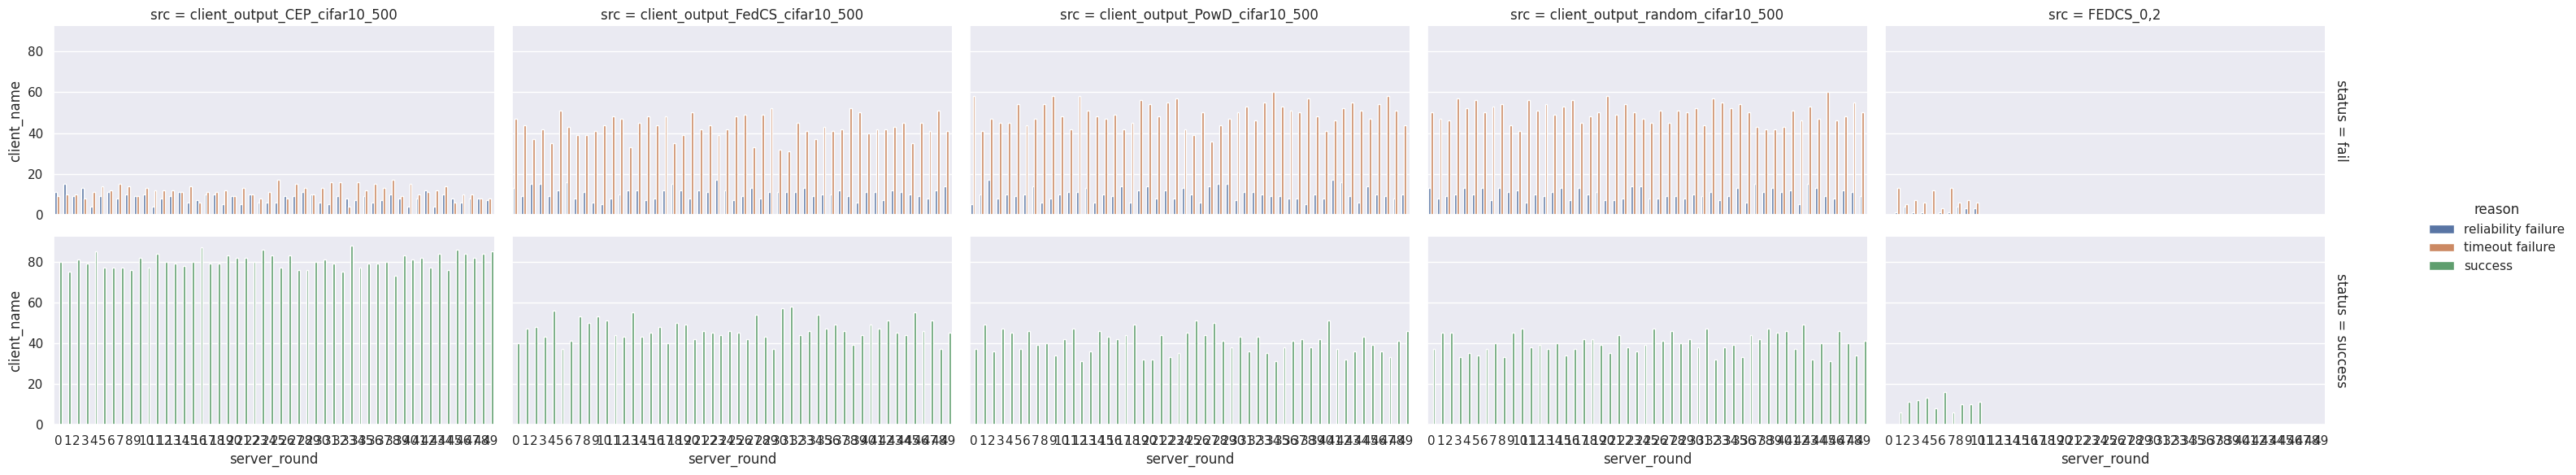

In [17]:
df['reason'].fillna('success', inplace=True)
df_plot = df[['server_round', 'status', 'src', 'client_name', 'reason']].groupby(['server_round', 'status','reason', 'src']).count().reset_index()

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(
    df_plot, x="server_round", y='client_name', row="status", hue="reason", col="src", height=3, aspect=2, kind="bar", margin_titles=True
)

<Axes: xlabel='server_round', ylabel='state.network_bandwidth'>

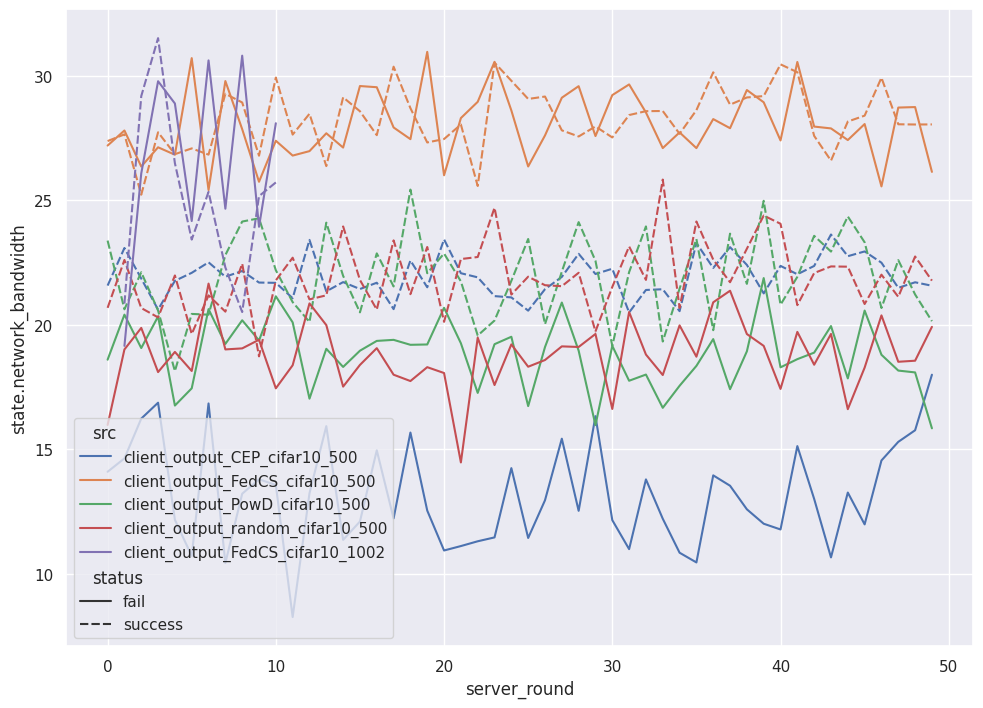

In [6]:
df_plot = df[['server_round', 'status', 'state.network_bandwidth', 'src']].groupby(['server_round', 'status', 'src']).mean().reset_index()

sns.set_theme(style="darkgrid")
sns.lineplot(data=df_plot, x="server_round", y="state.network_bandwidth", hue="src", style="status")

<Axes: xlabel='server_round', ylabel='state.cpu'>

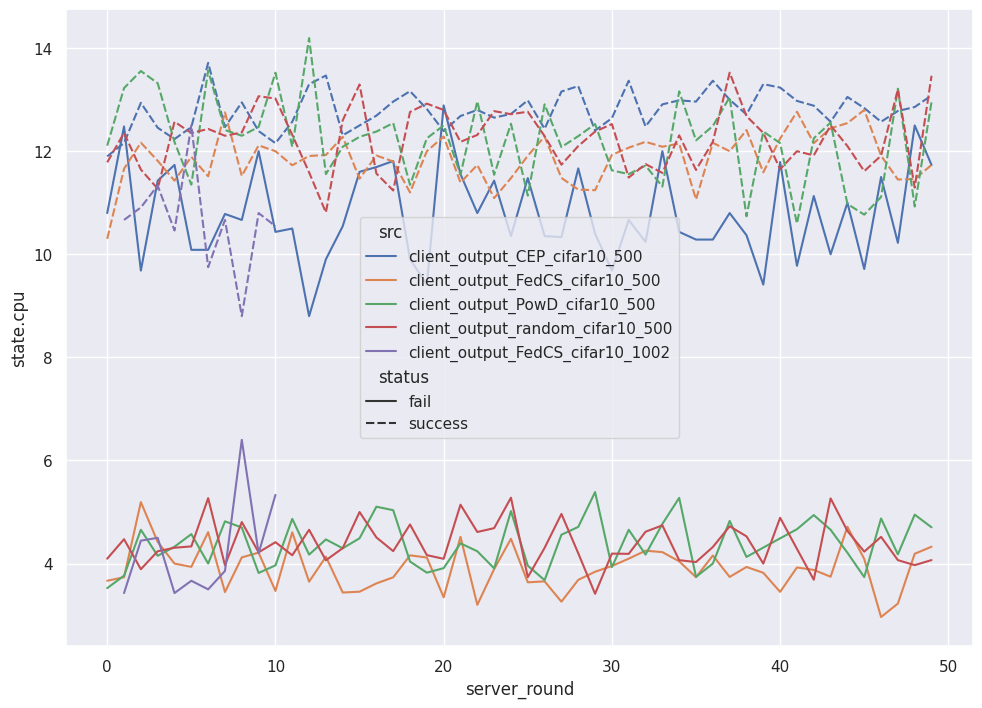

In [7]:
df_plot = df[['server_round', 'status', 'state.cpu', 'src']].groupby(['server_round', 'status', 'src']).mean().reset_index()

sns.set_theme(style="darkgrid")
sns.lineplot(data=df_plot, x="server_round", y="state.cpu", hue="src", style="status")

<Axes: xlabel='server_round', ylabel='train_output.avg_accuracy'>

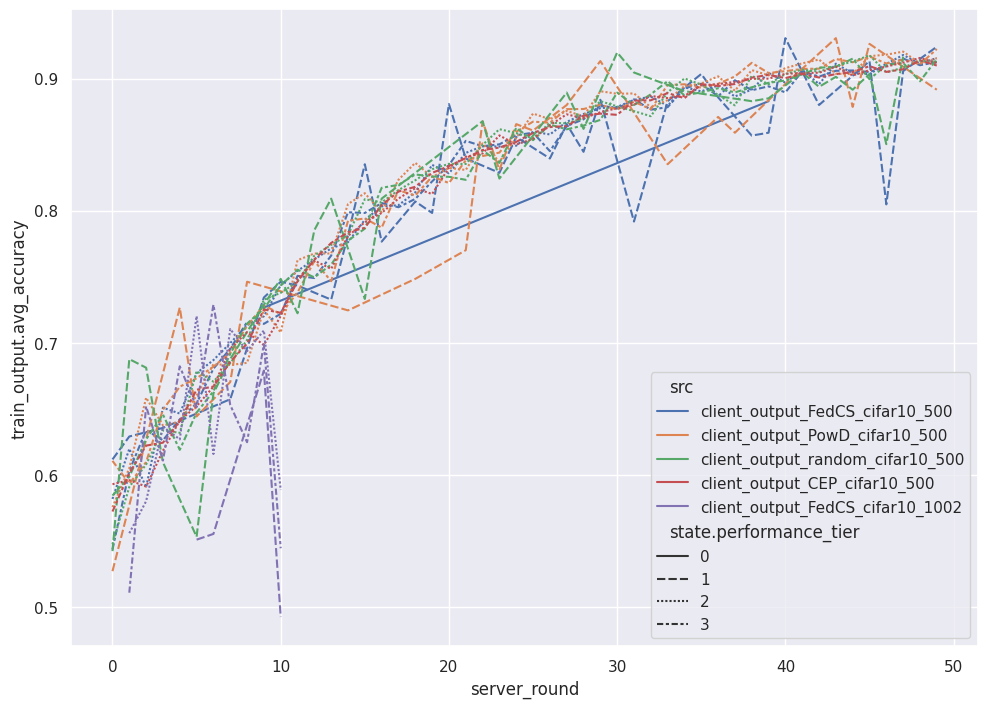

In [8]:
df_temp = df[df.status == 'success']
df_temp['train_output.avg_accuracy'] = df_temp['train_output.accuracy'].apply(lambda x: x[len(x)-1])
df_plot = df_temp[['server_round', 'status', 'train_output.avg_accuracy', 'src','state.performance_tier']].groupby(['server_round', 'state.performance_tier', 'status', 'src']).mean().reset_index()
sns.lineplot(data=df_plot, x="server_round", y="train_output.avg_accuracy", hue="src", style='state.performance_tier')

<Axes: xlabel='server_round', ylabel='train_output.avg_accuracy'>

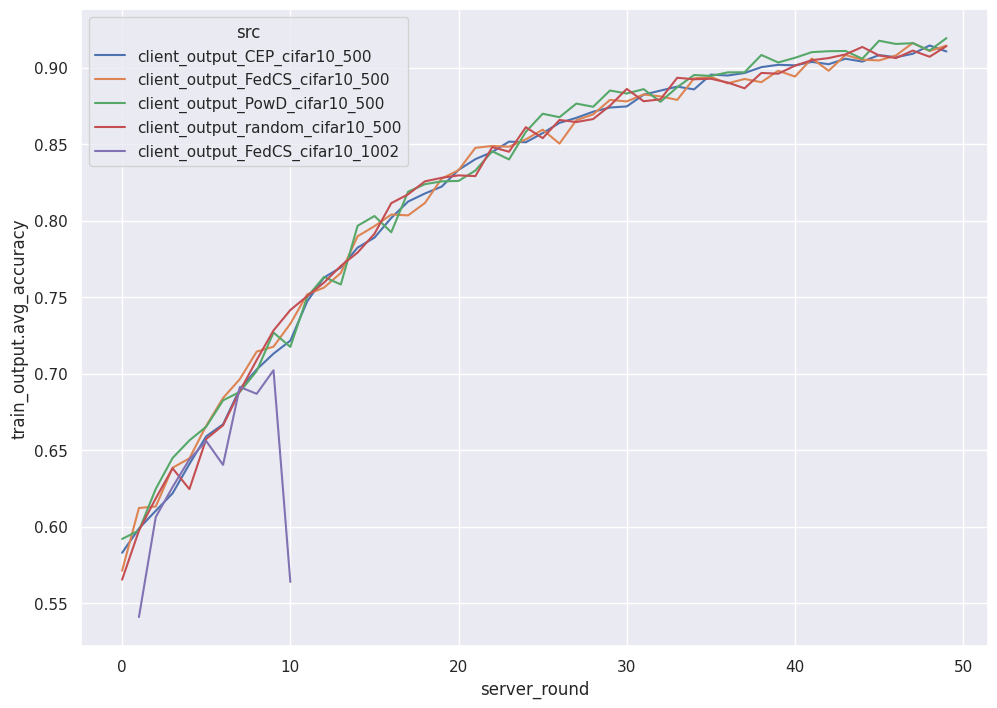

In [9]:
df_temp = df[df.status == 'success']
df_temp['train_output.avg_accuracy'] = df_temp['train_output.accuracy'].apply(lambda x: x[len(x)-1])
df_plot = df_temp[['server_round', 'status', 'train_output.avg_accuracy', 'src']].groupby(['server_round', 'status', 'src']).mean().reset_index()
sns.lineplot(data=df_plot, x="server_round", y="train_output.avg_accuracy", hue="src")

In [10]:
df_plot

,server_round,status,src,train_output.avg_accuracy
0,0,success,client_output_CEP_cifar10_500,0.582863
1,0,success,client_output_FedCS_cifar10_500,0.571095
2,0,success,client_output_PowD_cifar10_500,0.591898
3,0,success,client_output_random_cifar10_500,0.565281
4,1,success,client_output_CEP_cifar10_500,0.598727
...,...,...,...,...
205,48,success,client_output_random_cifar10_500,0.907107
206,49,success,client_output_CEP_cifar10_500,0.910553
207,49,success,client_output_FedCS_cifar10_500,0.914389
208,49,success,client_output_PowD_cifar10_500,0.919268


<Axes: xlabel='server_round', ylabel='execution_time'>

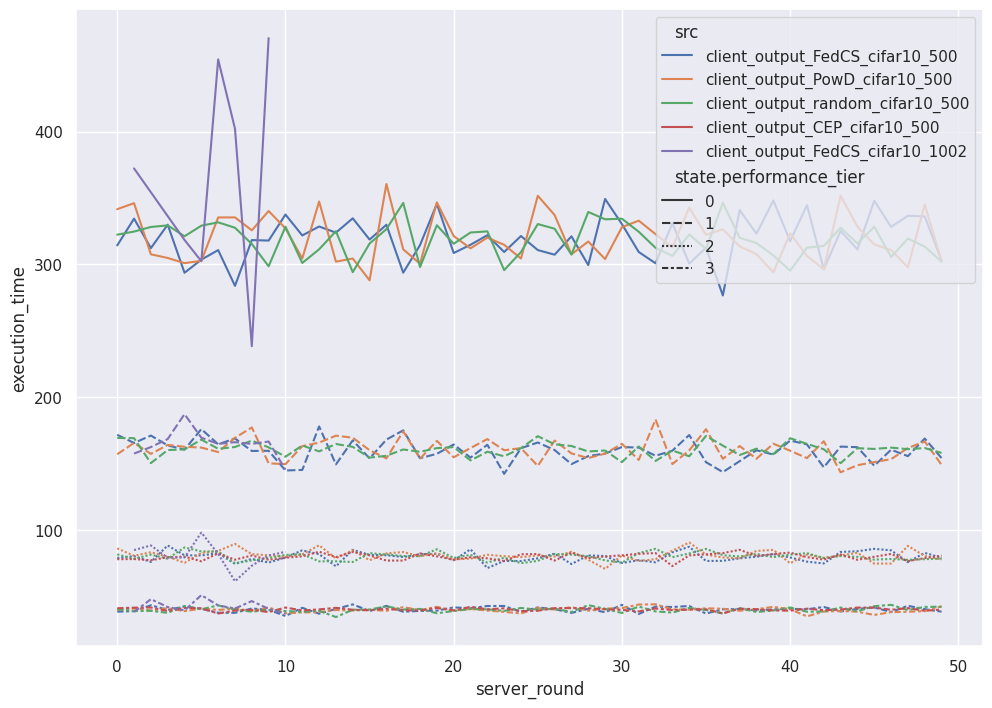

In [11]:
df_temp = df
df_plot = df_temp[['server_round', 'execution_time', 'src','state.performance_tier']].groupby(['server_round', 'state.performance_tier', 'src']).mean().reset_index()
sns.lineplot(data=df_plot, x="server_round", y="execution_time", hue="src", style='state.performance_tier')

<Axes: xlabel='server_round', ylabel='execution_time'>

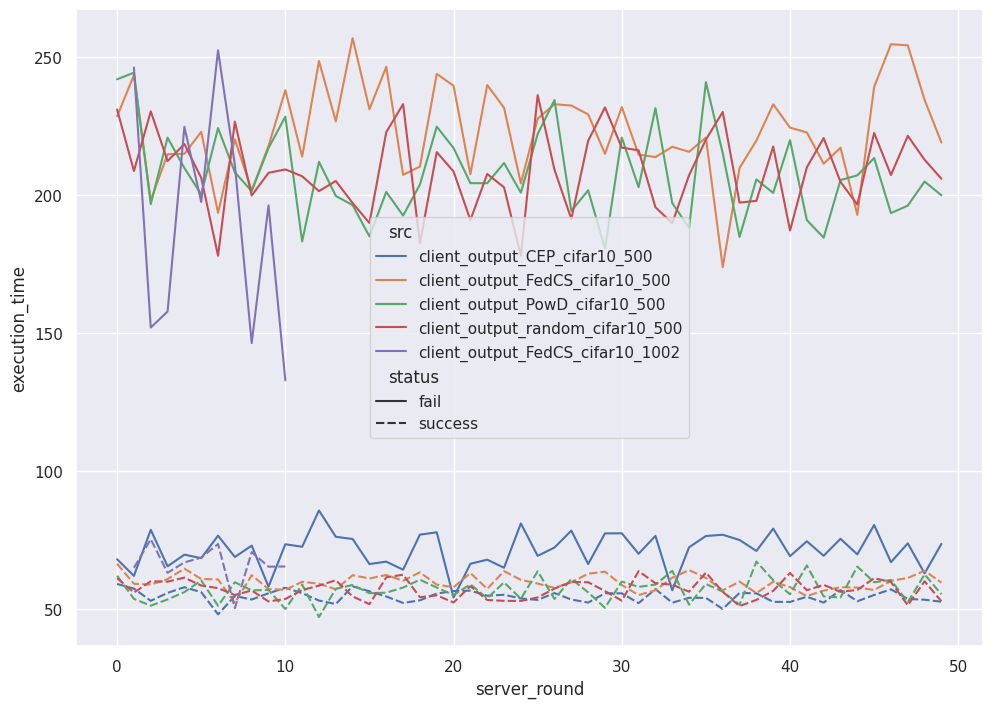

In [12]:
df_temp = df
df_plot = df_temp[['server_round', 'status', 'execution_time', 'upload_time', 'src']].groupby(['server_round', 'status', 'src']).mean().reset_index()
sns.lineplot(data=df_plot, x="server_round", y="execution_time", hue="src", style='status')

<Axes: xlabel='server_round', ylabel='upload_time'>

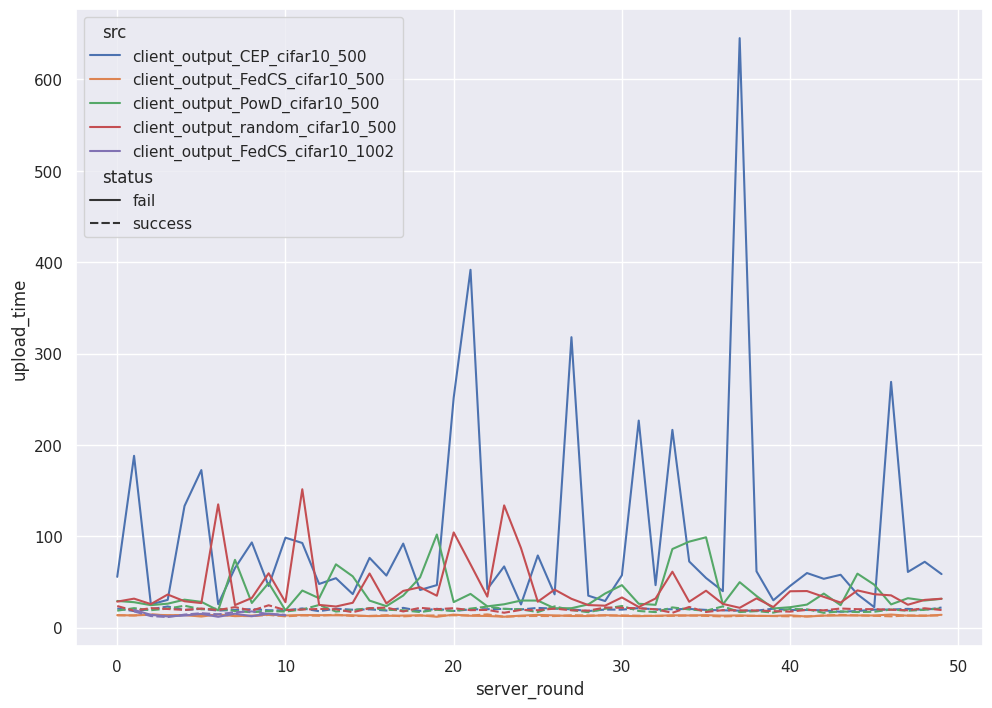

In [13]:
sns.lineplot(data=df_plot, x="server_round", y="upload_time", hue="src", style='status')